In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.model_selection import KFold, train_test_split
from keras.optimizers import Adam, SGD
from keras import regularizers

from preprocess import normalize

window_size_ms = 200.
samples_per_window = 20

In [70]:
jason_width = 411.43
jason_height = 774.857
true_ranges = np.array([jason_width, jason_height])
print(true_ranges.shape)

(2,)


In [66]:
touch_loc_y = np.load("processed/spacedout1-2_touch_loc_y.npy")
has_touch_y = np.load("processed/spacedout1-2_has_touch_y.npy")
touch_loc_y = touch_loc_y[has_touch_y == 1]

x_min = np.min(touch_loc_y[:,0])
x_max = np.max(touch_loc_y[:,0])
y_min = np.min(touch_loc_y[:,1])
y_max = np.max(touch_loc_y[:,1])
print(x_min)
print(x_max)
print(y_min)
print(y_max)

83.14286041259766
359.1428527832031
267.4285583496094
632.2857055664062


In [72]:
X = np.load("processed/spacedout1-2_X.npy")
has_touch_y = np.load("processed/spacedout1-2_has_touch_y.npy")
touch_loc_y = np.load("processed/spacedout1-2_touch_loc_y.npy")
X = X.reshape((-1, 120))
X = X[has_touch_y == 1]
touch_loc_y = touch_loc_y[has_touch_y == 1]
print(touch_loc_y[0:5])
touch_loc_y = touch_loc_y / true_ranges
print(touch_loc_y[0:5])

[[209.14285278 408.        ]
 [305.14285278 314.        ]
 [193.14285278 315.71429443]
 [207.71427917 497.42855835]
 [209.42857361 406.        ]]
[[0.50833156 0.52654877]
 [0.74166408 0.40523606]
 [0.4694428  0.40744846]
 [0.50485934 0.64196175]
 [0.50902602 0.52396765]]


In [74]:
print(X.shape)
print(touch_loc_y.shape)
print(np.ptp(X))
print(np.min(touch_loc_y))
print(np.max(touch_loc_y))

(621, 120)
(621, 2)
1.0
0.20208263960478734
0.8729136251201981


In [75]:
def build_model():
    model = Sequential()
    model.add(Dense(128, activation="relu", input_dim=(samples_per_window * 6)))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))#, kernel_regularizer=regularizers.l2(0.003)))
    model.add(Dense(2, activation="linear", kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer=SGD(lr=0.01, momentum=0.9), metrics = ["mse"])
    return model

In [25]:
model = build_model()
history = model.fit(np.random.rand(*X.shape), np.random.rand(*touch_loc_y.shape), epochs=100)

Epoch 1/200
621/621 [==============================] - 0s - loss: 0.1512 - mean_squared_error: 0.1512     
Epoch 2/200
621/621 [==============================] - 0s - loss: 0.0900 - mean_squared_error: 0.0900     
Epoch 3/200
621/621 [==============================] - 0s - loss: 0.0857 - mean_squared_error: 0.0857     
Epoch 4/200
621/621 [==============================] - 0s - loss: 0.0842 - mean_squared_error: 0.0842     
Epoch 5/200
621/621 [==============================] - 0s - loss: 0.0827 - mean_squared_error: 0.0827     
Epoch 6/200
621/621 [==============================] - 0s - loss: 0.0822 - mean_squared_error: 0.0822     
Epoch 7/200
621/621 [==============================] - 0s - loss: 0.0821 - mean_squared_error: 0.0821     
Epoch 8/200
621/621 [==============================] - 0s - loss: 0.0818 - mean_squared_error: 0.0818     
Epoch 9/200
621/621 [==============================] - 0s - loss: 0.0815 - mean_squared_error: 0.0815     
Epoch 10/200
621/621 [===============

621/621 [==============================] - 0s - loss: 0.0101 - mean_squared_error: 0.0101     
Epoch 77/200
621/621 [==============================] - 0s - loss: 0.0098 - mean_squared_error: 0.0098     
Epoch 78/200
621/621 [==============================] - 0s - loss: 0.0093 - mean_squared_error: 0.0093     
Epoch 79/200
621/621 [==============================] - 0s - loss: 0.0083 - mean_squared_error: 0.0083     
Epoch 80/200
621/621 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071     
Epoch 81/200
621/621 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068     
Epoch 82/200
621/621 [==============================] - 0s - loss: 0.0073 - mean_squared_error: 0.0073     
Epoch 83/200
621/621 [==============================] - 0s - loss: 0.0063 - mean_squared_error: 0.0063     
Epoch 84/200
621/621 [==============================] - 0s - loss: 0.0055 - mean_squared_error: 0.0055     
Epoch 85/200
621/621 [===================

621/621 [==============================] - 0s - loss: 6.1034e-05 - mean_squared_error: 6.1034e-05     
Epoch 149/200
621/621 [==============================] - 0s - loss: 5.4206e-05 - mean_squared_error: 5.4206e-05     
Epoch 150/200
621/621 [==============================] - 0s - loss: 4.9856e-05 - mean_squared_error: 4.9856e-05     
Epoch 151/200
621/621 [==============================] - 0s - loss: 4.5871e-05 - mean_squared_error: 4.5871e-05     
Epoch 152/200
621/621 [==============================] - 0s - loss: 4.1418e-05 - mean_squared_error: 4.1418e-05     
Epoch 153/200
621/621 [==============================] - 0s - loss: 3.9012e-05 - mean_squared_error: 3.9012e-05     
Epoch 154/200
621/621 [==============================] - 0s - loss: 3.9646e-05 - mean_squared_error: 3.9646e-05     
Epoch 155/200
621/621 [==============================] - 0s - loss: 3.5185e-05 - mean_squared_error: 3.5185e-05     
Epoch 156/200
621/621 [==============================] - 0s - loss: 3.6826e-05

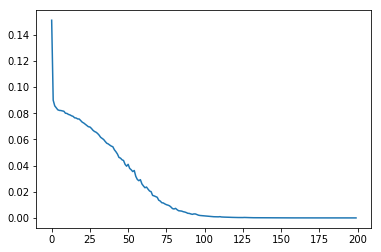

In [26]:
plt.plot(history.history["loss"])

In [76]:
kf = KFold(n_splits = 5, shuffle=True)
seed = 0

mses = []
histories = []

for train_idx, test_idx in kf.split(X, touch_loc_y):
    x_train, x_test = X[train_idx], X[test_idx]
    y_train, y_test = touch_loc_y[train_idx], touch_loc_y[test_idx]
    
    model = build_model()

    history = model.fit(x_train, y_train, epochs=300, batch_size=20, validation_data=(x_test, y_test))
    _, mse = model.evaluate(x_test, y_test)
    print("MSE: ", mse)
    mses.append(mse)
    histories.append(history)

Train on 496 samples, validate on 125 samples
Epoch 1/300
496/496 [==============================] - 0s - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 2/300
496/496 [==============================] - 0s - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 3/300
496/496 [==============================] - 0s - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 4/300
496/496 [==============================] - 0s - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 5/300
496/496 [==============================] - 0s - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 6/300
496/496 [==============================] - 0s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 7/300
496/496 [=========

496/496 [==============================] - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 54/300
496/496 [==============================] - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 55/300
496/496 [==============================] - 0s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 56/300
496/496 [==============================] - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 57/300
496/496 [==============================] - 0s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 58/300
496/496 [==============================] - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 59/300
496/496 [==============================] - 0s - loss: 0.0089 - mean_sq

496/496 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 106/300
496/496 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 107/300
496/496 [==============================] - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 108/300
496/496 [==============================] - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 109/300
496/496 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 110/300
496/496 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 111/300
496/496 [==============================] - 0s - loss: 0.0080 - m

496/496 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 158/300
496/496 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 159/300
496/496 [==============================] - 0s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 160/300
496/496 [==============================] - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 161/300
496/496 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 162/300
496/496 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 163/300
496/496 [==============================] - 0s - loss: 0.0071 - m

496/496 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 210/300
496/496 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 211/300
496/496 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 212/300
496/496 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 213/300
496/496 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 214/300
496/496 [==============================] - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 215/300
496/496 [==============================] - 0s - loss: 0.0071 - m

496/496 [==============================] - 0s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 262/300
496/496 [==============================] - 0s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 263/300
496/496 [==============================] - 0s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 264/300
496/496 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 265/300
496/496 [==============================] - 0s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 266/300
496/496 [==============================] - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 267/300
496/496 [==============================] - 0s - loss: 0.0061 - m

497/497 [==============================] - 0s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 13/300
497/497 [==============================] - 0s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 14/300
497/497 [==============================] - 0s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 15/300
497/497 [==============================] - 0s - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 16/300
497/497 [==============================] - 0s - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 17/300
497/497 [==============================] - 0s - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 18/300
497/497 [==============================] - 0s - loss: 0.0109 - mean_sq

497/497 [==============================] - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 65/300
497/497 [==============================] - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 66/300
497/497 [==============================] - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 67/300
497/497 [==============================] - 0s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 68/300
497/497 [==============================] - 0s - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 69/300
497/497 [==============================] - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 70/300
497/497 [==============================] - 0s - loss: 0.0086 - mean_sq

497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 117/300
497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 118/300
497/497 [==============================] - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 119/300
497/497 [==============================] - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 120/300
497/497 [==============================] - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 121/300
497/497 [==============================] - 0s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 122/300
497/497 [==============================] - 0s - loss: 0.0081 - m

497/497 [==============================] - 0s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 169/300
497/497 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 170/300
497/497 [==============================] - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 171/300
497/497 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 172/300
497/497 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 173/300
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 174/300
497/497 [==============================] - 0s - loss: 0.0076 - m

497/497 [==============================] - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 221/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 222/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 223/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 224/300
497/497 [==============================] - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 225/300
497/497 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 226/300
497/497 [==============================] - 0s - loss: 0.0082 - m

497/497 [==============================] - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 273/300
497/497 [==============================] - 0s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 274/300
497/497 [==============================] - 0s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 275/300
497/497 [==============================] - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 276/300
497/497 [==============================] - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 277/300
497/497 [==============================] - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 278/300
497/497 [==============================] - 0s - loss: 0.0057 - m

497/497 [==============================] - 0s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 25/300
497/497 [==============================] - 0s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 26/300
497/497 [==============================] - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 27/300
497/497 [==============================] - 0s - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 28/300
497/497 [==============================] - 0s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 29/300
497/497 [==============================] - 0s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 30/300
497/497 [==============================] - 0s - loss: 0.0103 - mean_sq

497/497 [==============================] - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 77/300
497/497 [==============================] - 0s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 78/300
497/497 [==============================] - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 79/300
497/497 [==============================] - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 80/300
497/497 [==============================] - 0s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 81/300
497/497 [==============================] - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 82/300
497/497 [==============================] - 0s - loss: 0.0087 - mean_sq

497/497 [==============================] - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 129/300
497/497 [==============================] - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 130/300
497/497 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 131/300
497/497 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 132/300
497/497 [==============================] - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 133/300
497/497 [==============================] - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 134/300
497/497 [==============================] - 0s - loss: 0.0083 - m

497/497 [==============================] - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 181/300
497/497 [==============================] - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 182/300
497/497 [==============================] - 0s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 183/300
497/497 [==============================] - 0s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 184/300
497/497 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 185/300
497/497 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 186/300
497/497 [==============================] - 0s - loss: 0.0074 - m

497/497 [==============================] - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 233/300
497/497 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 234/300
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 235/300
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 236/300
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 237/300
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 238/300
497/497 [==============================] - 0s - loss: 0.0071 - m

497/497 [==============================] - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 285/300
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 286/300
497/497 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 287/300
497/497 [==============================] - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 288/300
497/497 [==============================] - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 289/300
497/497 [==============================] - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 290/300
497/497 [==============================] - 0s - loss: 0.0062 - m

497/497 [==============================] - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 37/300
497/497 [==============================] - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 38/300
497/497 [==============================] - 0s - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 39/300
497/497 [==============================] - 0s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 40/300
497/497 [==============================] - 0s - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 41/300
497/497 [==============================] - 0s - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 42/300
497/497 [==============================] - 0s - loss: 0.0098 - mean_sq

497/497 [==============================] - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 89/300
497/497 [==============================] - 0s - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 90/300
497/497 [==============================] - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 91/300
497/497 [==============================] - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 92/300
497/497 [==============================] - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 93/300
497/497 [==============================] - 0s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 94/300
497/497 [==============================] - 0s - loss: 0.0084 - mean_sq

497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 141/300
497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 142/300
497/497 [==============================] - 0s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 143/300
497/497 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 144/300
497/497 [==============================] - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 145/300
497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 146/300
497/497 [==============================] - 0s - loss: 0.0080 - m

497/497 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 193/300
497/497 [==============================] - 0s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 194/300
497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 195/300
497/497 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 196/300
497/497 [==============================] - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 197/300
497/497 [==============================] - 0s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 198/300
497/497 [==============================] - 0s - loss: 0.0071 - m

497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 245/300
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 246/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 247/300
497/497 [==============================] - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 248/300
497/497 [==============================] - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 249/300
497/497 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 250/300
497/497 [==============================] - 0s - loss: 0.0067 - m

497/497 [==============================] - 0s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 297/300
497/497 [==============================] - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 298/300
497/497 [==============================] - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 299/300
497/497 [==============================] - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 300/300
 32/124 [======>.......................] - ETA: 0sMSE:  0.007180317252453777
Train on 497 samples, validate on 124 samples
Epoch 1/300
497/497 [==============================] - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 2/300
497/497 [==============================] - 0s - loss: 0.0171 - mean_squared_error: 0.01

497/497 [==============================] - 0s - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 49/300
497/497 [==============================] - 0s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 50/300
497/497 [==============================] - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 51/300
497/497 [==============================] - 0s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 52/300
497/497 [==============================] - 0s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 53/300
497/497 [==============================] - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 54/300
497/497 [==============================] - 0s - loss: 0.0090 - mean_sq

497/497 [==============================] - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 101/300
497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 102/300
497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 103/300
497/497 [==============================] - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 104/300
497/497 [==============================] - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 105/300
497/497 [==============================] - 0s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 106/300
497/497 [==============================] - 0s - loss: 0.0078 - m

497/497 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 153/300
497/497 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 154/300
497/497 [==============================] - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 155/300
497/497 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 156/300
497/497 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 157/300
497/497 [==============================] - 0s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 158/300
497/497 [==============================] - 0s - loss: 0.0074 - m

497/497 [==============================] - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 205/300
497/497 [==============================] - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 206/300
497/497 [==============================] - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 207/300
497/497 [==============================] - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 208/300
497/497 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 209/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 210/300
497/497 [==============================] - 0s - loss: 0.0066 - m

497/497 [==============================] - 0s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 257/300
497/497 [==============================] - 0s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 258/300
497/497 [==============================] - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 259/300
497/497 [==============================] - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 260/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 261/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 262/300
497/497 [==============================] - 0s - loss: 0.0058 - m

In [77]:
print(mses)
print(np.mean(mses))

[0.00965166499465704, 0.010596859058545481, 0.008149004451209498, 0.007180317252453777, 0.010248948594615344]
0.009165358870296228


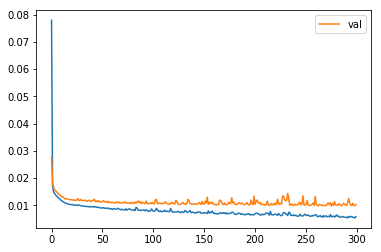

In [78]:
plt.plot(histories[4].history["loss"])
plt.plot(histories[4].history["val_loss"], label="val")
plt.legend()

/Users/jessy/.virtualenvs/cocosci/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


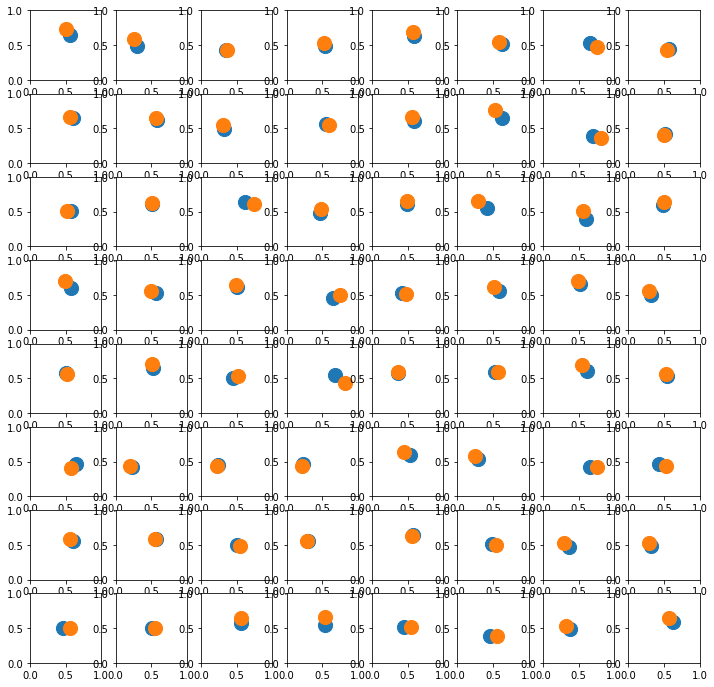

In [80]:
# PLOT ** TRAIN ** RESULTS

nrows = 8
ncols = 8

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
axes = axes.reshape(-1)

for i in range(nrows * ncols):
    axes[i].scatter(*model.predict(x_train)[60+i], s=200)
    axes[i].scatter(*y_train[60+i], s=200)
    
    axes[i].set_xlim(0, 1)
    axes[i].set_ylim(0, 1)

fig.show()

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X, touch_loc_y, test_size=0.1)
model = build_model()
history = model.fit(x_train, y_train, epochs=200, batch_size=20, validation_data=(x_test, y_test))

Train on 558 samples, validate on 63 samples
Epoch 1/200
558/558 [==============================] - 0s - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 2/200
558/558 [==============================] - 0s - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 3/200
558/558 [==============================] - 0s - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 4/200
558/558 [==============================] - 0s - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 5/200
558/558 [==============================] - 0s - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 6/200
558/558 [==============================] - 0s - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 7/200
558/558 [==========

558/558 [==============================] - 0s - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 54/200
558/558 [==============================] - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 55/200
558/558 [==============================] - 0s - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 56/200
558/558 [==============================] - 0s - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 57/200
558/558 [==============================] - 0s - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 58/200
558/558 [==============================] - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 59/200
558/558 [==============================] - 0s - loss: 0.0092 - mean_sq

558/558 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 106/200
558/558 [==============================] - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 107/200
558/558 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 108/200
558/558 [==============================] - 0s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 109/200
558/558 [==============================] - 0s - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 110/200
558/558 [==============================] - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 111/200
558/558 [==============================] - 0s - loss: 0.0082 - m

558/558 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 158/200
558/558 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 159/200
558/558 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 160/200
558/558 [==============================] - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 161/200
558/558 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 162/200
558/558 [==============================] - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 163/200
558/558 [==============================] - 0s - loss: 0.0072 - m

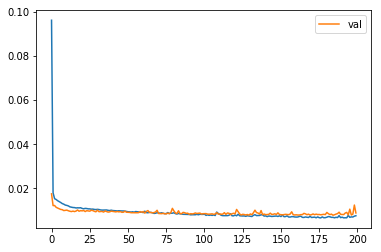

In [82]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"], label="val")
plt.legend()

In [83]:
model.save("touch_loc_model.h5")

/Users/jessy/.virtualenvs/cocosci/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


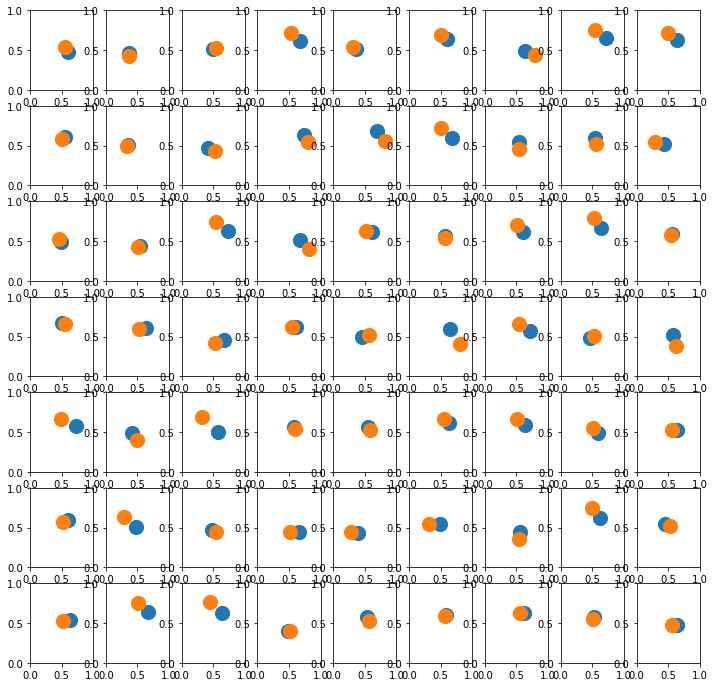

In [84]:
nrows = 7
ncols = 9

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
axes = axes.reshape(-1)

for i in range(nrows * ncols):
    axes[i].scatter(*model.predict(x_test)[i], s=200)
    axes[i].scatter(*y_test[i], s=200)
    
    axes[i].set_xlim(0, 1)
    axes[i].set_ylim(0, 1)

fig.show()